# Surface concentrations

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import netCDF4 as nc
from datetime import date

%matplotlib notebook

###### Parameters:

In [3]:
imin, imax = 1480, 2180
jmin, jmax = 160, 800
isize = imax - imin
jsize = jmax - jmin

# model results:
year = 2002
# results_folder1 = '/data/brogalla/run_storage/Mn-set5-202008/ref-'+str(year)+'/'
# results_folder2 = '/data/brogalla/run_storage/Mn-set4-202004/ref-'+str(year)+'/'
# results_folder3 = '/data/brogalla/run_storage/Mn-cleanice-202011/clean-ice-'+str(year)+'/'
# results_folder4 = '/data/brogalla/run_storage/Mn-upperriv-202011/upper-riv-'+str(year)+'/'
# results_folder5 = '/data/brogalla/run_storage/Mn-set6-202011/ref-'+str(year)+'/'
# results_folder6 = '/data/brogalla/run_storage/Mn-nosed-202005/nosed-'+str(year)+'/'
# results_folder1 = '/data/brogalla/run_storage/Mn-set6-202011/ref-'+str(year)+'-new-burial-old-river/'
# results_folder2 = '/data/brogalla/run_storage/Mn-set4-202004/ref-'+str(year)+'/'
# results_folder3 = '/data/brogalla/run_storage/Mn-set6-202011/ref-'+str(year)+'-old-burial/'
# results_folder4 = '/data/brogalla/run_storage/Mn-set6-202011/ref-'+str(year)+'-new-burial-rusustuning1/'
# results_folder5 = '/data/brogalla/run_storage/Mn-set6-202011/ref-'+str(year)+'/'
# results_folder6 = '/data/brogalla/run_storage/ref-'+str(year)+'-oldice-newatm/'
# results_folder6 = '/data/brogalla/run_storage/Mn-nosed-202005/nosed-'+str(year)+'/'

# results_folder1 = '/data/brogalla/run_storage/Mn-set4-202004/ref-spin-up0/'
# results_folder2 = '/data/brogalla/run_storage/Mn-set4-202004/ref-spin-up1/'
# results_folder3 = '/data/brogalla/run_storage/Mn-set4-202004/ref-spin-up2/'
# results_folder4 = '/data/brogalla/run_storage/Mn-set4-202004/ref-spin-up3/'
# results_folder5 = '/data/brogalla/run_storage/Mn-set4-202004/ref-spin-up4/'
# results_folder6 = '/data/brogalla/run_storage/Mn-set4-202004/ref-spin-up5/'

# results_folder7 = '/data/brogalla/run_storage/Mn-testing-202012/spin-up0/'
# results_folder8 = '/data/brogalla/run_storage/Mn-testing-202012/spin-up1/'
# results_folder9 = '/data/brogalla/run_storage/Mn-testing-202012/spin-up2/'
# results_folder10 = '/data/brogalla/run_storage/Mn-testing-202012/spin-up3/'
# results_folder11 = '/data/brogalla/run_storage/Mn-testing-202012/spin-up3/'
# results_folder12 = '/data/brogalla/run_storage/Mn-testing-202012/spin-up3/'

results_folder1 = '/data/brogalla/run_storage/Mn-set4-202004/ref-spin-up0/'
results_folder2 = '/data/brogalla/run_storage/Mn-set6-202011/spin-up0/'
results_folder3 = '/data/brogalla/run_storage/Mn-set4-202004/ref-spin-up7/'
results_folder4 = '/data/brogalla/run_storage/spin-up0-step5c/'
results_folder5 = '/data/brogalla/run_storage/spin-up0-step6/'
results_folder6 = '/data/brogalla/run_storage/spin-up0-step7c/'

In [4]:
stn_i = np.array([104-1, 100, 91, 175, 175, 233, 214, 352, 242, 458, 508, 547, 629])
stn_j = np.array([370, 365, 353, 311, 326, 313, 281, 281, 364, 332, 384, 457, 471])
stn_n = np.array(['CAA1','CAA2','CAA3','CAA4','CAA5','CAA6','CAA7',
                  'CAA8','CAA9', 'CB1','CB2','CB3','CB4'])

###### Load files:

In [5]:
mask      = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask     = np.array(mask.variables['tmask'])[0,:,imin:imax,jmin:jmax]
land_mask = np.ma.masked_where((tmask[:,:,:] > 0.1), tmask[:,:,:]) 

In [6]:
ref   = nc.Dataset(results_folder1+'ANHA12_EXH006_'+str(year)+'_monthly.nc',  'r')
lons  = np.array(ref.variables['nav_lon'])
lats  = np.array(ref.variables['nav_lat'])
depth = np.array(ref.variables['deptht'])

In [7]:
results1  = nc.Dataset(results_folder1+'ANHA12_EXH006_'+str(year)+'_monthly.nc')
dissolmn1 = np.array(results1.variables['dissolmn'][:,0,:,:,:])*10**9 # nM units
oxidismn1 = np.array(results1.variables['oxidismn'][:,0,:,:,:])*10**9 # nM units

In [8]:
results2  = nc.Dataset(results_folder2+'ANHA12_EXH006_'+str(year)+'_monthly.nc')
dissolmn2 = np.array(results2.variables['dissolmn'][:,0,:,:,:])*10**9 # nM units
oxidismn2 = np.array(results2.variables['oxidismn'][:,0,:,:,:])*10**9 # nM units

In [9]:
results3  = nc.Dataset(results_folder3+'ANHA12_EXH006_'+str(year)+'_monthly.nc')
dissolmn3 = np.array(results3.variables['dissolmn'][:,0,:,:,:])*10**9 # nM units
oxidismn3 = np.array(results3.variables['oxidismn'][:,0,:,:,:])*10**9 # nM units

In [10]:
results4  = nc.Dataset(results_folder4+'ANHA12_EXH006_'+str(year)+'_monthly.nc')
dissolmn4 = np.array(results4.variables['dissolmn'][:,0,:,:,:])*10**9 # nM units
oxidismn4 = np.array(results4.variables['oxidismn'][:,0,:,:,:])*10**9 # nM units

In [11]:
results5  = nc.Dataset(results_folder5+'ANHA12_EXH006_'+str(year)+'_monthly.nc')
dissolmn5 = np.array(results5.variables['dissolmn'][:,0,:,:,:])*10**9 # nM units
oxidismn5 = np.array(results5.variables['oxidismn'][:,0,:,:,:])*10**9 # nM units

In [12]:
results6  = nc.Dataset(results_folder6+'ANHA12_EXH006_'+str(year)+'_monthly.nc')
dissolmn6 = np.array(results6.variables['dissolmn'][:,0,:,:,:])*10**9 # nM units
oxidismn6 = np.array(results6.variables['oxidismn'][:,0,:,:,:])*10**9 # nM units

In [ ]:
results7  = nc.Dataset(results_folder7+'ANHA12_EXH006_'+str(year)+'_monthly.nc')
dissolmn7 = np.array(results7.variables['dissolmn'][:,0,:,:,:])*10**9 # nM units
oxidismn7 = np.array(results7.variables['oxidismn'][:,0,:,:,:])*10**9 # nM units

In [42]:
results8  = nc.Dataset(results_folder8+'ANHA12_EXH006_'+str(year)+'_monthly.nc')
dissolmn8 = np.array(results8.variables['dissolmn'][:,0,:,:,:])*10**9 # nM units
oxidismn8 = np.array(results8.variables['oxidismn'][:,0,:,:,:])*10**9 # nM units

In [43]:
results9  = nc.Dataset(results_folder9+'ANHA12_EXH006_'+str(year)+'_monthly.nc')
dissolmn9 = np.array(results9.variables['dissolmn'][:,0,:,:,:])*10**9 # nM units
oxidismn9 = np.array(results9.variables['oxidismn'][:,0,:,:,:])*10**9 # nM units

In [44]:
results10  = nc.Dataset(results_folder10+'ANHA12_EXH006_'+str(year)+'_monthly.nc')
dissolmn10 = np.array(results10.variables['dissolmn'][:,0,:,:,:])*10**9 # nM units
oxidismn10 = np.array(results10.variables['oxidismn'][:,0,:,:,:])*10**9 # nM units

In [45]:
results11  = nc.Dataset(results_folder11+'ANHA12_EXH006_'+str(year)+'_monthly.nc')
dissolmn11 = np.array(results11.variables['dissolmn'][:,0,:,:,:])*10**9 # nM units
oxidismn11 = np.array(results11.variables['oxidismn'][:,0,:,:,:])*10**9 # nM units

In [46]:
results12  = nc.Dataset(results_folder12+'ANHA12_EXH006_'+str(year)+'_monthly.nc')
dissolmn12 = np.array(results12.variables['dissolmn'][:,0,:,:,:])*10**9 # nM units
oxidismn12 = np.array(results12.variables['oxidismn'][:,0,:,:,:])*10**9 # nM units

In [13]:
mask      = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask     = np.array(mask.variables['tmask'])[0,:,imin:imax,jmin:jmax]
land_mask = np.ma.masked_where((tmask[:,:,:] > 0.1), tmask[:,:,:]) 

e1t_base = np.array(mask.variables['e1t'])[0,imin:imax,jmin:jmax]
e2t_base = np.array(mask.variables['e2t'])[0,imin:imax,jmin:jmax]
e3t      = np.array(mask.variables['e3t_0'])[0,:,imin:imax,jmin:jmax]

e1t      = np.tile(e1t_base, (50,1,1))
e2t      = np.tile(e2t_base, (50,1,1))
volume   = e1t*e2t*e3t

##### Functions:

In [14]:
def plot_layer(month, variable, vmin=0,vmax=35):
    
    plot_var = np.mean(variable[month,1:17,:,:], axis=0)
#     plot_var = variable[month,0,:,:]
    
    fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

    x, y = proj1(lons, lats)

    contour = proj1.contourf(x, y, plot_var, np.arange(vmin,vmax+1,2.5),\
                             cmap=cmocean.cm.dense, vmin=vmin, vmax=vmax, extend='both')

    cbar_ax = fig.add_axes([0.72, 0.14, 0.04, 0.6])
    cbar    = fig.colorbar(contour, cax=cbar_ax, ticks=np.arange(0,35,5))#[0,2,4,6,8,10,12])
    cbar.set_label('Dissolved Mn [nM]', fontsize=8) 
    cbar_ax.tick_params(axis='both', which='major', labelsize=8)
    
    figure = plt.gcf()
    figure.set_size_inches(4.5*1.8, 3.7)
    
    ax1.plot(x[i1,j1], y[i1,j1], '.r', markersize=10, zorder=5)
    ax1.plot(x[i2,j2], y[i2,j2], '.b', markersize=10, zorder=5)
    ax1.plot(x[i3,j3], y[i3,j3], '.b', markersize=10, zorder=5)
    ax1.plot(x[i4,j4], y[i4,j4], '.b', markersize=10, zorder=5)
    return

In [15]:
month=5
i1  = 608; j1  = 418; # Canada Basin
i2  = 528; j2  = 190; # Amundsen Gulf
i3  = 198; j3  = 140; # South central
i4  = 80 ; j4  = 200; # Gulf of Boothia

<IPython.core.display.Javascript object>


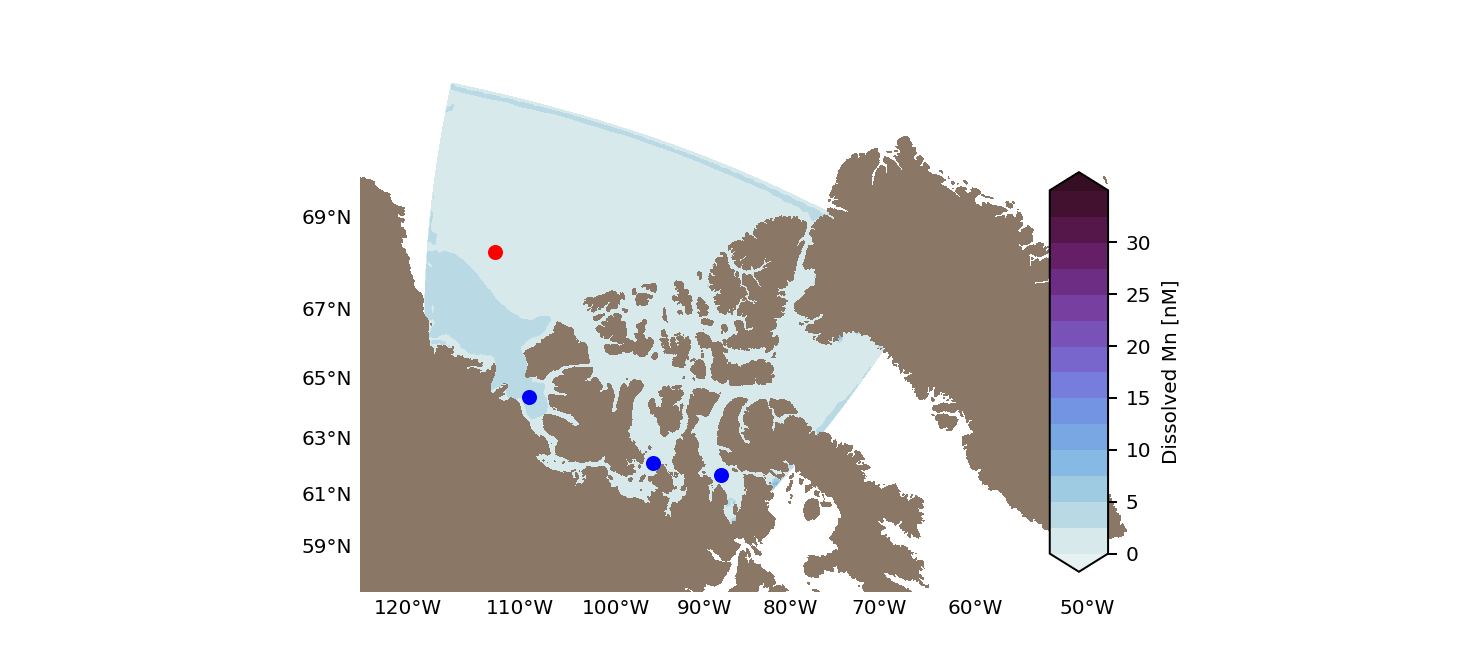

In [20]:
plot_layer(0, dissolmn1)

In [16]:
c = ['#f28327','#fffc4c','#adea32','#16ec83','#0087db','#00375d']

<IPython.core.display.Javascript object>


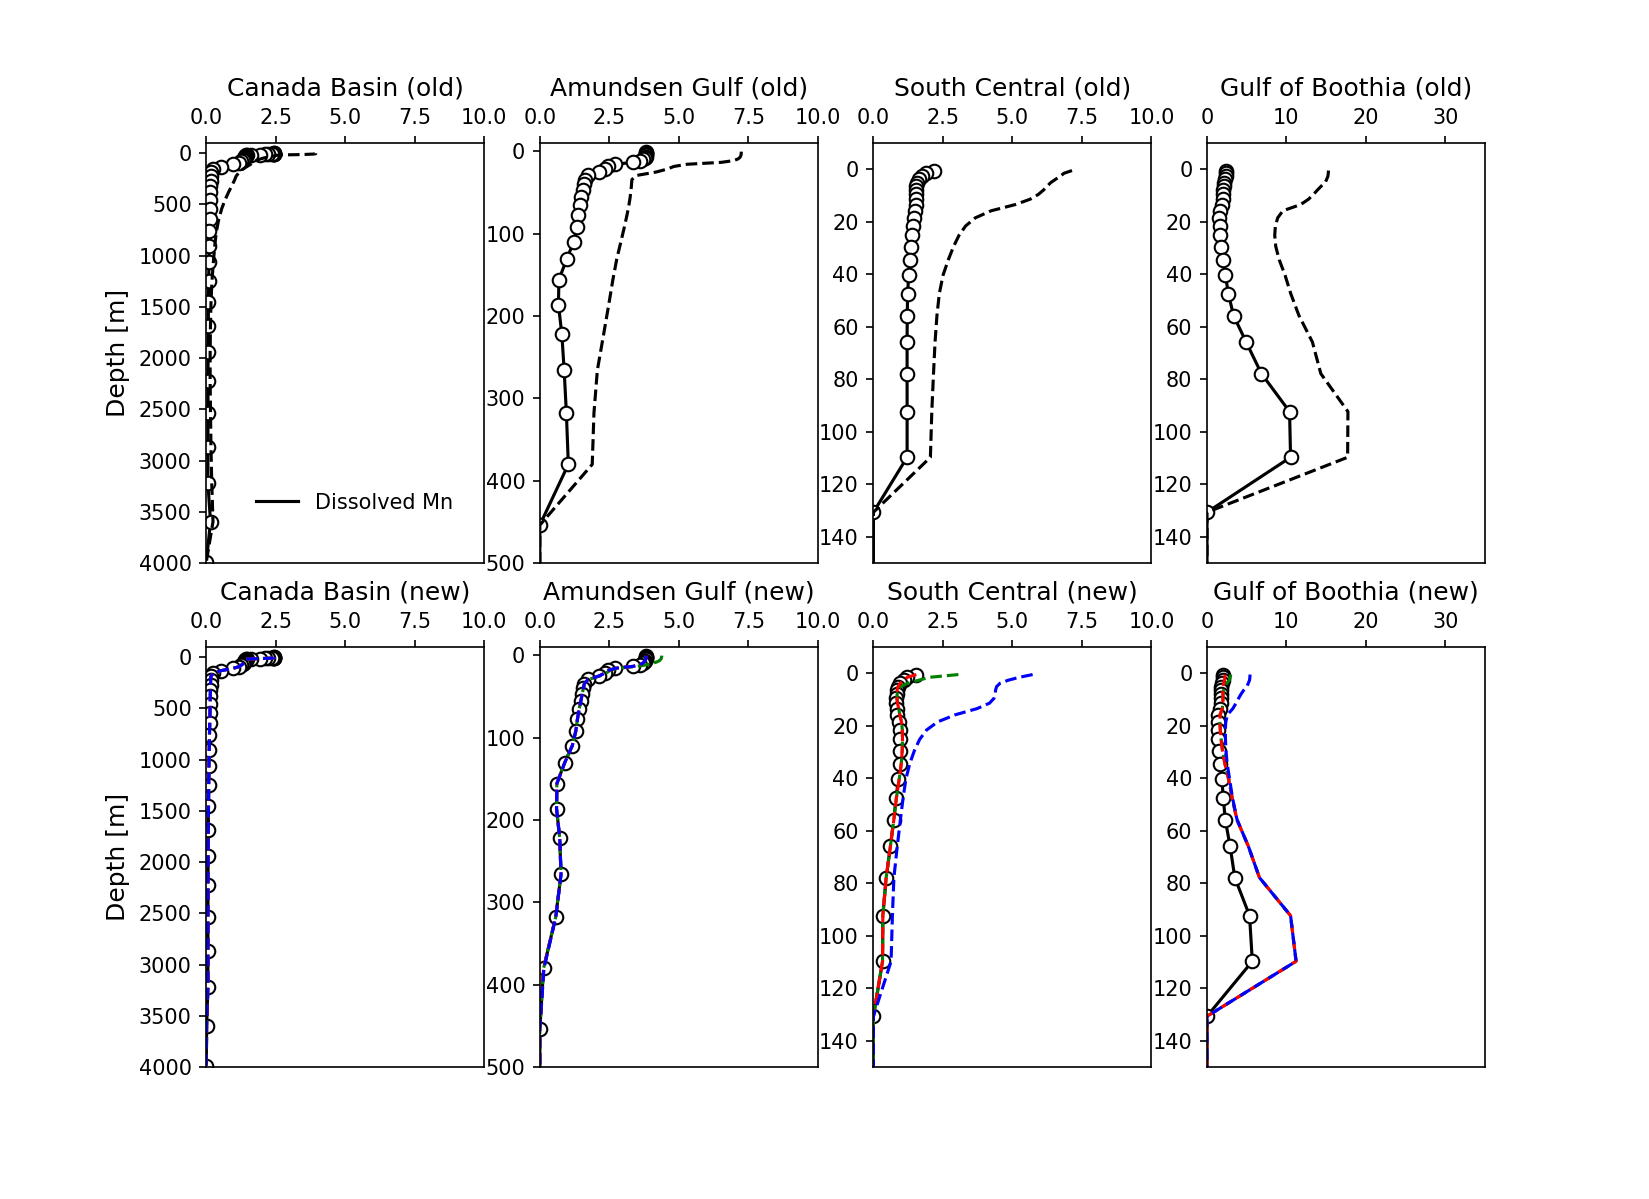

(0, 35)

In [21]:
month=5

fig, ax = plt.subplots(2,4, figsize=(11,8))

for axes in ax.flatten():
    axes.invert_yaxis()
#     axes.set_xlabel('Mn', fontsize=12)
    axes.tick_params(axis='both', labelsize=10)
    axes.xaxis.tick_top()    
    axes.xaxis.set_label_position('top') 
    axes.set_xlim(0,10)
    
ax[0,0].plot(dissolmn1[month,:,i1,j1], depth, '-k', label='Dissolved Mn')
ax[0,0].plot(dissolmn1[month,:,i1,j1], depth, '.w', markersize=13, markeredgecolor='k')
ax[0,0].plot(dissolmn3[month,:,i1,j1], depth, '--k')
ax[0,0].set_title('Canada Basin (old)')

ax[0,1].plot(dissolmn1[month,:,i2,j2], depth, '-k')
ax[0,1].plot(dissolmn1[month,:,i2,j2], depth, '.w', markersize=13, markeredgecolor='k')
ax[0,1].plot(dissolmn3[month,:,i2,j2], depth, '--k')
ax[0,1].set_title('Amundsen Gulf (old)')

ax[0,2].plot(dissolmn1[month,:,i3,j3], depth, '-k')
ax[0,2].plot(dissolmn1[month,:,i3,j3], depth, '.w', markersize=13, markeredgecolor='k')
ax[0,2].plot(dissolmn3[month,:,i3,j3], depth, '--k')
ax[0,2].set_title('South Central (old)')

ax[0,3].plot(dissolmn1[month,:,i4,j4], depth, '-k')
ax[0,3].plot(dissolmn1[month,:,i4,j4], depth, '.w', markersize=13, markeredgecolor='k')
ax[0,3].plot(dissolmn3[month,:,i4,j4], depth, '--k')
ax[0,3].set_title('Gulf of Boothia (old)')

ax[1,0].plot(dissolmn2[month,:,i1,j1], depth, '-k')
ax[1,0].plot(dissolmn2[month,:,i1,j1], depth, '.w', markersize=13, markeredgecolor='k')
ax[1,0].plot(dissolmn4[month,:,i1,j1], depth, '--g')
ax[1,0].plot(dissolmn5[month,:,i1,j1], depth, '--r')
ax[1,0].plot(dissolmn6[month,:,i1,j1], depth, '--b')
ax[1,0].set_title('Canada Basin (new)')

ax[1,1].plot(dissolmn2[month,:,i2,j2], depth, '-k')
ax[1,1].plot(dissolmn2[month,:,i2,j2], depth, '.w', markersize=13, markeredgecolor='k')
ax[1,1].plot(dissolmn4[month,:,i2,j2], depth, '--g')
ax[1,1].plot(dissolmn5[month,:,i2,j2], depth, '--r')
ax[1,1].plot(dissolmn6[month,:,i2,j2], depth, '--b')
ax[1,1].set_title('Amundsen Gulf (new)')

ax[1,2].plot(dissolmn2[month,:,i3,j3], depth, '-k')
ax[1,2].plot(dissolmn2[month,:,i3,j3], depth, '.w', markersize=13, markeredgecolor='k')
ax[1,2].plot(dissolmn4[month,:,i3,j3], depth, '--g')
ax[1,2].plot(dissolmn5[month,:,i3,j3], depth, '--r')
ax[1,2].plot(dissolmn6[month,:,i3,j3], depth, '--b')
ax[1,2].set_title('South Central (new)')

ax[1,3].plot(dissolmn2[month,:,i4,j4], depth, '-k')
ax[1,3].plot(dissolmn2[month,:,i4,j4], depth, '.w', markersize=13, markeredgecolor='k')
ax[1,3].plot(dissolmn4[month,:,i4,j4], depth, '--g')
ax[1,3].plot(dissolmn5[month,:,i4,j4], depth, '--r')
ax[1,3].plot(dissolmn6[month,:,i4,j4], depth, '--b')
ax[1,3].set_title('Gulf of Boothia (new)')

ax[0,0].set_ylim(4000,-100); ax[1,0].set_ylim(4000,-100);
ax[0,1].set_ylim(500,-10); ax[1,1].set_ylim(500,-10);
ax[0,2].set_ylim(150,-10); ax[1,2].set_ylim(150,-10);
ax[0,3].set_ylim(150,-10); ax[1,3].set_ylim(150,-10);

ax[0,0].set_ylabel('Depth [m]', fontsize=12)
ax[1,0].set_ylabel('Depth [m]', fontsize=12)
ax[0,0].legend(loc=(0.15, 0.1), frameon=False,fontsize=10)
ax[0,3].set_xlim(0,35)
ax[1,3].set_xlim(0,35)

<IPython.core.display.Javascript object>


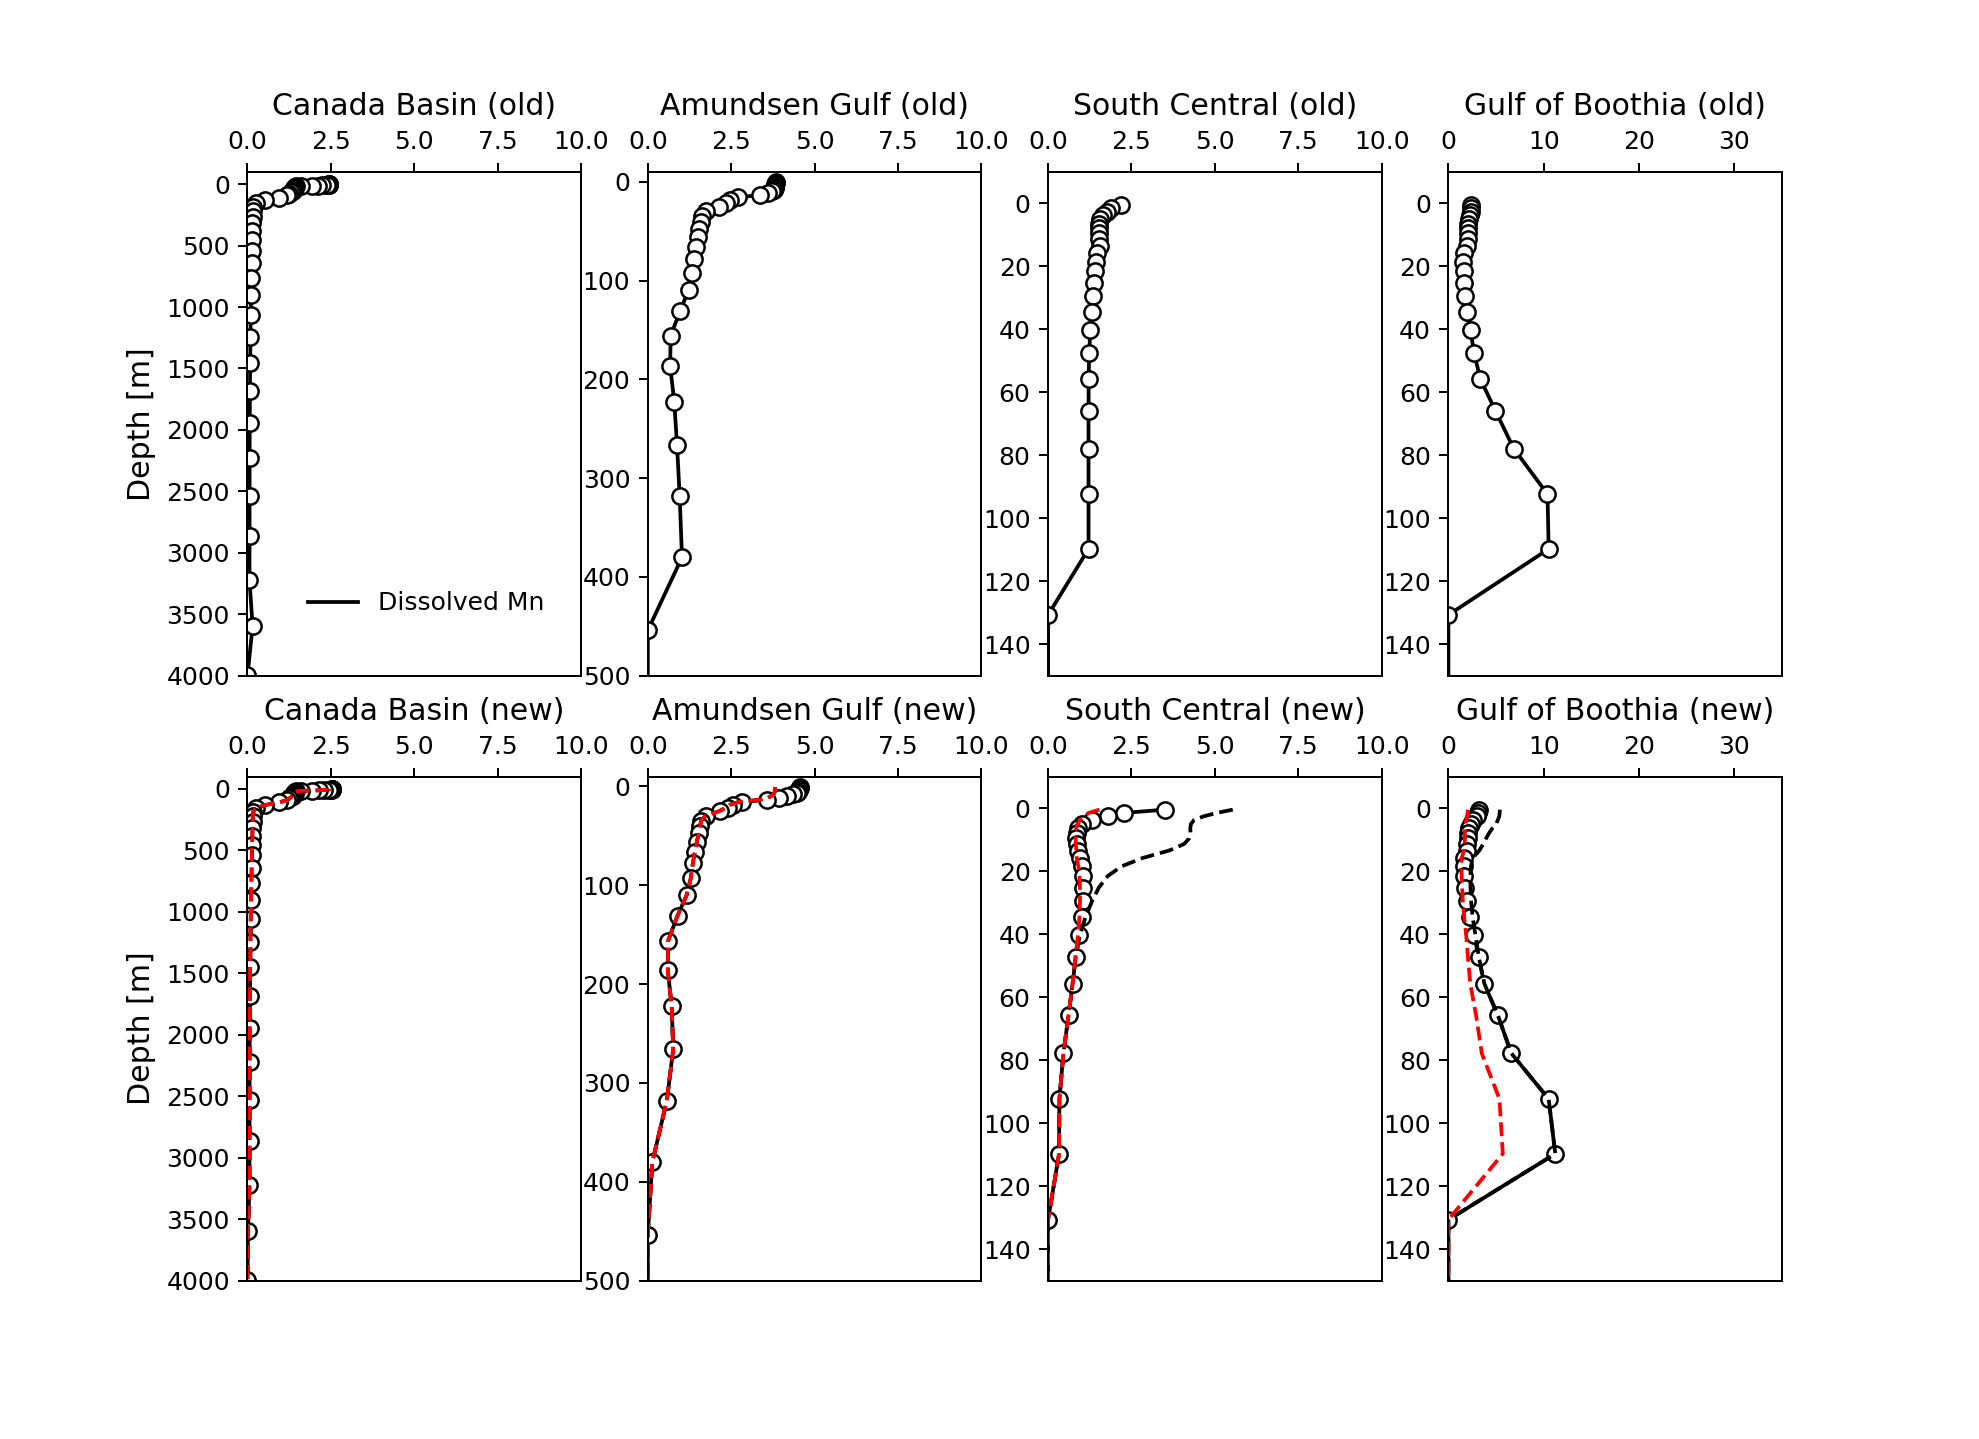

(0, 35)

In [28]:
month=5

fig, ax = plt.subplots(2,4, figsize=(11,8))

for axes in ax.flatten():
    axes.invert_yaxis()
#     axes.set_xlabel('Mn', fontsize=12)
    axes.tick_params(axis='both', labelsize=10)
    axes.xaxis.tick_top()    
    axes.xaxis.set_label_position('top') 
    axes.set_xlim(0,10)
    
ax[0,0].plot(dissolmn2[month,:,i1,j1], depth, '-k', label='Dissolved Mn')
ax[0,0].plot(dissolmn2[month,:,i1,j1], depth, '.w', markersize=13, markeredgecolor='k')
# ax[0,0].plot(oxidismn2[month,:,i1,j1], depth, '-b', label='Oxidised Mn')
# ax[0,0].plot(oxidismn2[month,:,i1,j1], depth, '.w', markersize=13, markeredgecolor='b')
ax[0,0].set_title('Canada Basin (old)')

ax[0,1].plot(dissolmn2[month,:,i2,j2], depth, '-k')
ax[0,1].plot(dissolmn2[month,:,i2,j2], depth, '.w', markersize=13, markeredgecolor='k')
# ax[0,1].plot(oxidismn2[month,:,i2,j2], depth, '-b')
# ax[0,1].plot(oxidismn2[month,:,i2,j2], depth, '.w', markersize=13, markeredgecolor='b')
ax[0,1].set_title('Amundsen Gulf (old)')

ax[0,2].plot(dissolmn2[month,:,i3,j3], depth, '-k')
ax[0,2].plot(dissolmn2[month,:,i3,j3], depth, '.w', markersize=13, markeredgecolor='k')
# ax[0,2].plot(oxidismn2[month,:,i3,j3], depth, '-b')
# ax[0,2].plot(oxidismn2[month,:,i3,j3], depth, '.w', markersize=13, markeredgecolor='b')
ax[0,2].set_title('South Central (old)')

ax[0,3].plot(dissolmn2[month,:,i4,j4], depth, '-k')
ax[0,3].plot(dissolmn2[month,:,i4,j4], depth, '.w', markersize=13, markeredgecolor='k')
# ax[0,3].plot(oxidismn2[month,:,i4,j4], depth, '-b')
# ax[0,3].plot(oxidismn2[month,:,i4,j4], depth, '.w', markersize=13, markeredgecolor='b')
ax[0,3].set_title('Gulf of Boothia (old)')

# results_folder3 = '/data/brogalla/run_storage/Mn-set6-202011/ref-'+str(year)+'-old-burial/'
# results_folder4 = '/data/brogalla/run_storage/Mn-set6-202011/ref-'+str(year)+'-new-burial-rusustuning1/'

ax[1,0].plot(dissolmn5[month,:,i1,j1], depth, '-k')
ax[1,0].plot(dissolmn5[month,:,i1,j1], depth, '.w', markersize=13, markeredgecolor='k')
# ax[1,0].plot(oxidismn5[month,:,i1,j1], depth, '-b')
# ax[1,0].plot(oxidismn5[month,:,i1,j1], depth, '.w', markersize=13, markeredgecolor='b')
# ax[1,0].plot(oxidismn1[month,:,i1,j1], depth, '-r')
# ax[1,0].plot(oxidismn1[month,:,i1,j1], depth, '.w', markersize=13, markeredgecolor='r')
ax[1,0].plot(dissolmn6[month,:,i1,j1], depth, '--k')
# ax[1,0].plot(oxidismn6[month,:,i1,j1], depth, '--b')
ax[1,0].plot(dissolmn1[month,:,i1,j1], depth, '--r')
ax[1,0].set_title('Canada Basin (new)')

ax[1,1].plot(dissolmn5[month,:,i2,j2], depth, '-k')
ax[1,1].plot(dissolmn5[month,:,i2,j2], depth, '.w', markersize=13, markeredgecolor='k')
# ax[1,1].plot(oxidismn5[month,:,i2,j2], depth, '-b')
# ax[1,1].plot(oxidismn5[month,:,i2,j2], depth, '.w', markersize=13, markeredgecolor='b')
# ax[1,1].plot(dissolmn4[month,:,i2,j2], depth, '--k')
# ax[1,1].plot(oxidismn4[month,:,i2,j2], depth, '--b')
ax[1,1].plot(dissolmn6[month,:,i2,j2], depth, '--k')
# ax[1,1].plot(oxidismn6[month,:,i2,j2], depth, '--b')
ax[1,1].plot(dissolmn1[month,:,i2,j2], depth, '--r')
# ax[1,1].plot(oxidismn1[month,:,i2,j2], depth, '.w', markersize=13, markeredgecolor='r')
ax[1,1].set_title('Amundsen Gulf (new)')

ax[1,2].plot(dissolmn5[month,:,i3,j3], depth, '-k')
ax[1,2].plot(dissolmn5[month,:,i3,j3], depth, '.w', markersize=13, markeredgecolor='k')
# ax[1,2].plot(oxidismn5[month,:,i3,j3], depth, '-b')
# ax[1,2].plot(oxidismn5[month,:,i3,j3], depth, '.w', markersize=13, markeredgecolor='b')
# ax[1,2].plot(dissolmn4[month,:,i3,j3], depth, '--k')
# ax[1,2].plot(oxidismn4[month,:,i3,j3], depth, '--b')
ax[1,2].plot(dissolmn6[month,:,i3,j3], depth, '--k')
# ax[1,2].plot(oxidismn6[month,:,i3,j3], depth, '--b')
ax[1,2].plot(dissolmn1[month,:,i3,j3], depth, '--r')
# ax[1,2].plot(oxidismn1[month,:,i3,j3], depth, '-r')
# ax[1,2].plot(oxidismn1[month,:,i3,j3], depth, '.w', markersize=13, markeredgecolor='r')
ax[1,2].set_title('South Central (new)')

ax[1,3].plot(dissolmn5[month,:,i4,j4], depth, '-k')
ax[1,3].plot(dissolmn5[month,:,i4,j4], depth, '.w', markersize=13, markeredgecolor='k')
# ax[1,3].plot(oxidismn5[month,:,i4,j4], depth, '-b')
# ax[1,3].plot(oxidismn5[month,:,i4,j4], depth, '.w', markersize=13, markeredgecolor='b')
# ax[1,3].plot(dissolmn4[month,:,i4,j4], depth, '--k')
# ax[1,3].plot(oxidismn4[month,:,i4,j4], depth, '--b')
ax[1,3].plot(dissolmn6[month,:,i4,j4], depth, '--k')
# ax[1,3].plot(oxidismn6[month,:,i4,j4], depth, '--b')
ax[1,3].plot(dissolmn1[month,:,i4,j4], depth, '--r')
# ax[1,3].plot(oxidismn3[month,:,i1,j1], depth, '-r')
# ax[1,3].plot(oxidismn3[month,:,i1,j1], depth, '.w', markersize=13, markeredgecolor='r')
ax[1,3].set_title('Gulf of Boothia (new)')

ax[0,0].set_ylim(4000,-100); ax[1,0].set_ylim(4000,-100);
ax[0,1].set_ylim(500,-10); ax[1,1].set_ylim(500,-10);
ax[0,2].set_ylim(150,-10); ax[1,2].set_ylim(150,-10);
ax[0,3].set_ylim(150,-10); ax[1,3].set_ylim(150,-10);

ax[0,0].set_ylabel('Depth [m]', fontsize=12)
ax[1,0].set_ylabel('Depth [m]', fontsize=12)
ax[0,0].legend(loc=(0.15, 0.1), frameon=False,fontsize=10)
ax[0,3].set_xlim(0,35)
ax[1,3].set_xlim(0,35)

<IPython.core.display.Javascript object>


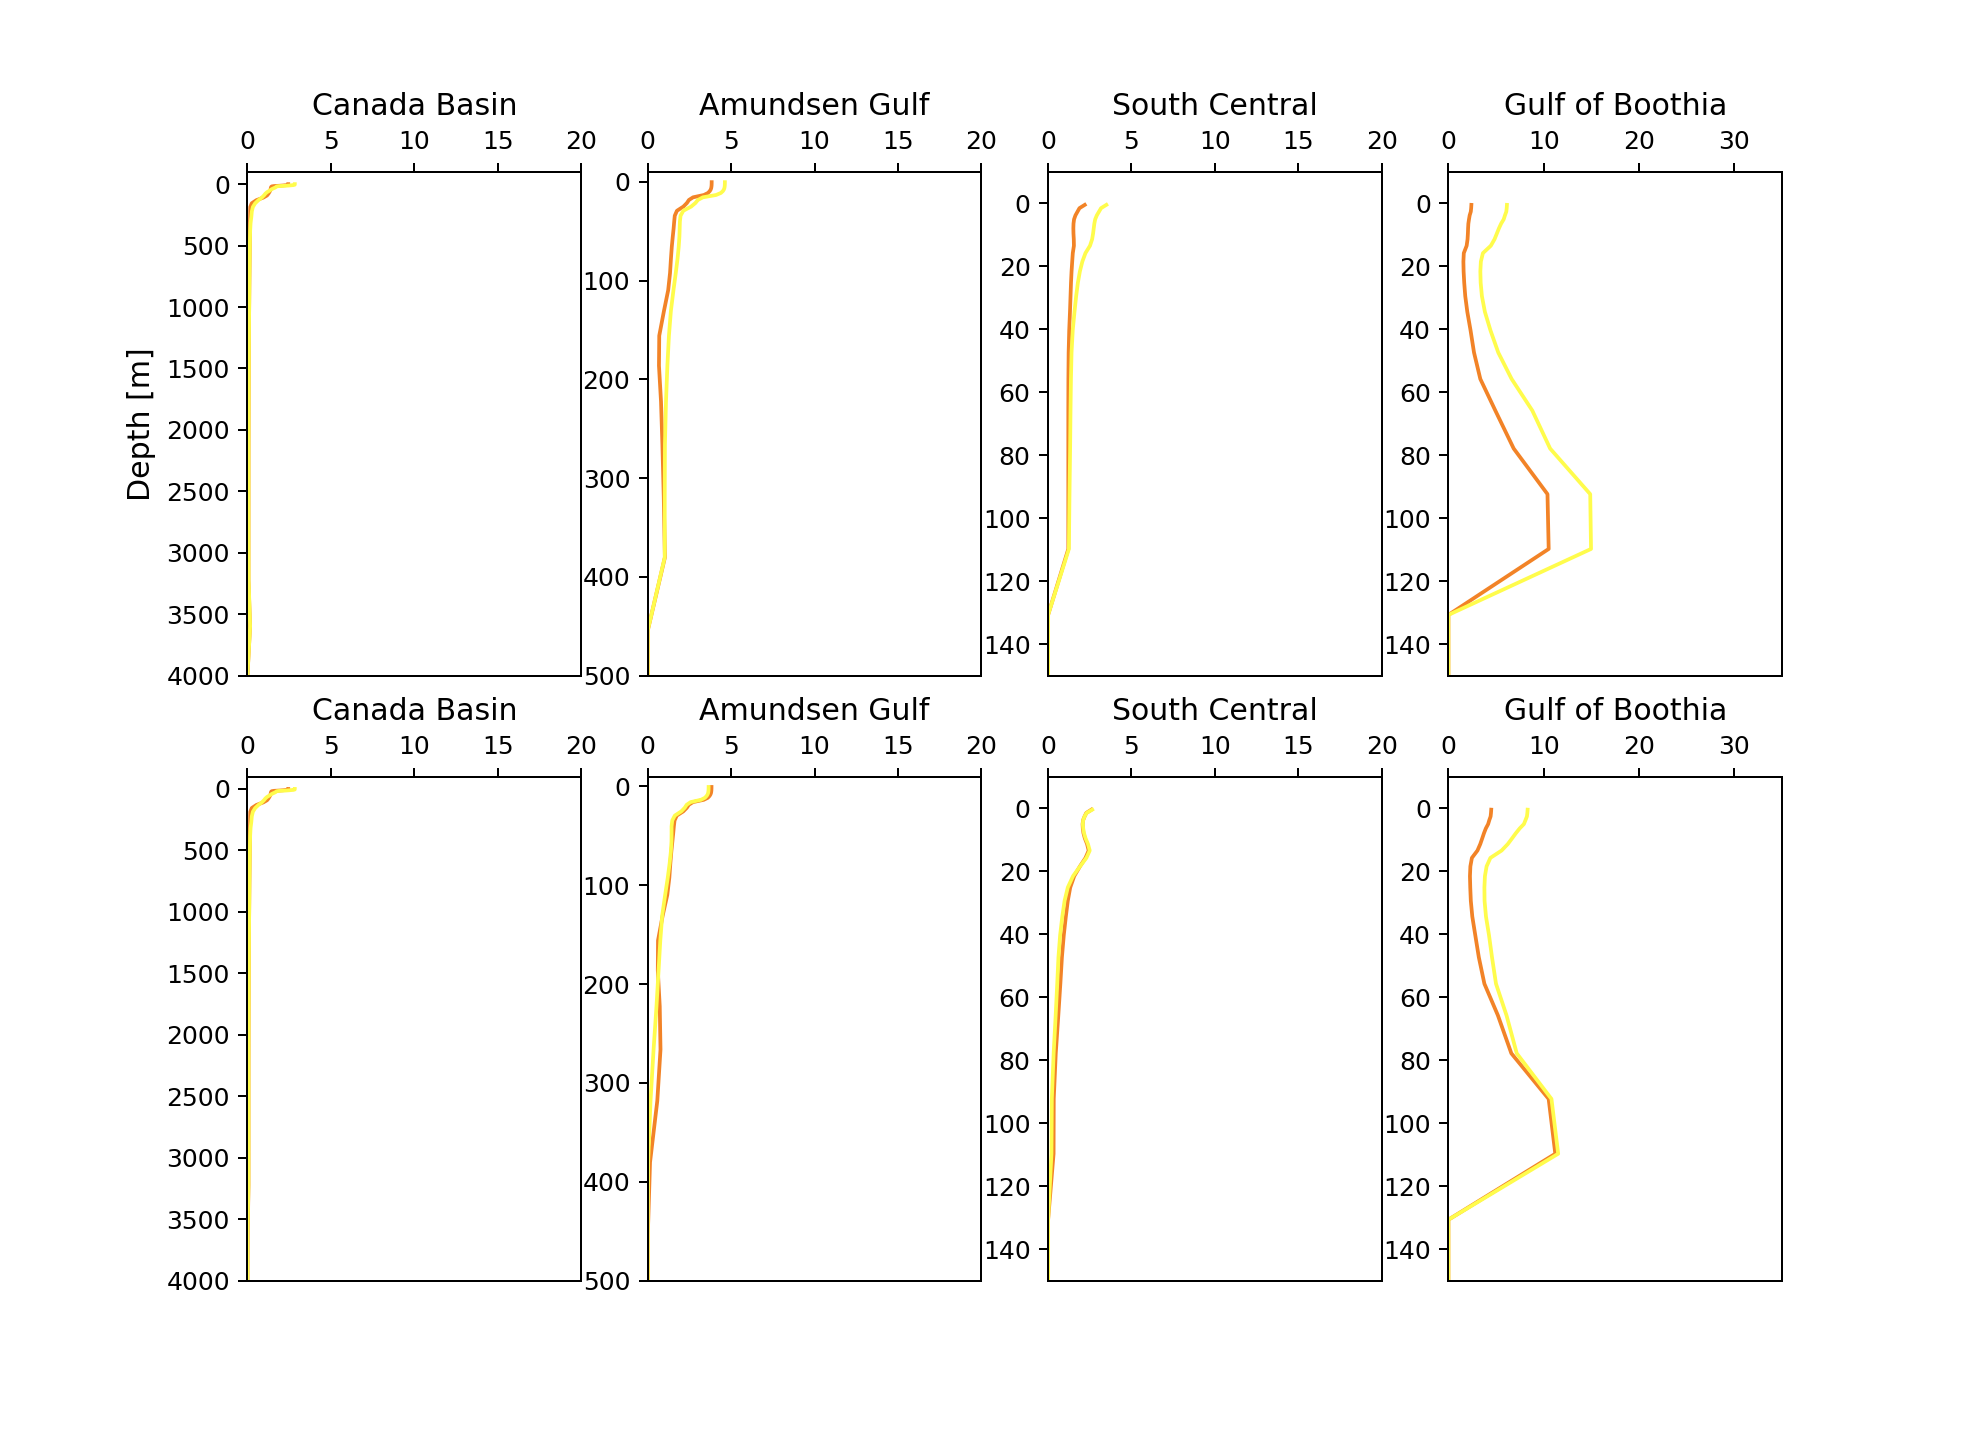

No handles with labels found to put in legend.


In [23]:
fig, ax = plt.subplots(2,4, figsize=(11,8))

for axes in ax.flatten():
    axes.invert_yaxis()
#     axes.set_xlabel('Mn', fontsize=12)
    axes.tick_params(axis='both', labelsize=10)
    axes.xaxis.tick_top()    
    axes.xaxis.set_label_position('top') 
    axes.set_xlim(0,20)
    
ax[0,0].plot(dissolmn1[month,:,i1,j1], depth, '-', color=c[0])
ax[0,0].plot(dissolmn2[month,:,i1,j1], depth, '-', color=c[1])
ax[0,0].set_title('Canada Basin')

ax[0,1].plot(dissolmn1[month,:,i2,j2], depth, '-', color=c[0])
ax[0,1].plot(dissolmn2[month,:,i2,j2], depth, '-', color=c[1])
ax[0,1].set_title('Amundsen Gulf')

ax[0,2].plot(dissolmn1[month,:,i3,j3], depth, '-', color=c[0])
ax[0,2].plot(dissolmn2[month,:,i3,j3], depth, '-', color=c[1])
ax[0,2].set_title('South Central')

ax[0,3].plot(dissolmn1[month,:,i4,j4], depth, '-', color=c[0])
ax[0,3].plot(dissolmn2[month,:,i4,j4], depth, '-', color=c[1])
ax[0,3].set_title('Gulf of Boothia')


ax[1,0].plot(dissolmn5[month,:,i1,j1], depth, '-', color=c[0])
ax[1,0].plot(dissolmn6[month,:,i1,j1], depth, '-', color=c[1])
ax[1,0].set_title('Canada Basin')

ax[1,1].plot(dissolmn5[month,:,i2,j2], depth, '-', color=c[0])
ax[1,1].plot(dissolmn6[month,:,i2,j2], depth, '-', color=c[1])
ax[1,1].set_title('Amundsen Gulf')

ax[1,2].plot(dissolmn5[month,:,i3,j3], depth, '-', color=c[0])
ax[1,2].plot(dissolmn6[month,:,i3,j3], depth, '-', color=c[1])
ax[1,2].set_title('South Central')

ax[1,3].plot(dissolmn5[month,:,i4,j4], depth, '-', color=c[0])
ax[1,3].plot(dissolmn6[month,:,i4,j4], depth, '-', color=c[1])
ax[1,3].set_title('Gulf of Boothia')

ax[0,0].set_ylim(4000,-100)
ax[1,0].set_ylim(4000,-100)
ax[0,1].set_ylim(500,-10)
ax[1,1].set_ylim(500,-10)
ax[0,2].set_ylim(150,-10)
ax[1,2].set_ylim(150,-10)
ax[0,3].set_ylim(150,-10)
ax[1,3].set_ylim(150,-10)
ax[0,3].set_xlim(0,35)
ax[1,3].set_xlim(0,35)

ax[0,0].set_ylabel('Depth [m]', fontsize=12)
ax[0,0].legend(loc=(0.15, 0.1), frameon=False,fontsize=10)

<IPython.core.display.Javascript object>


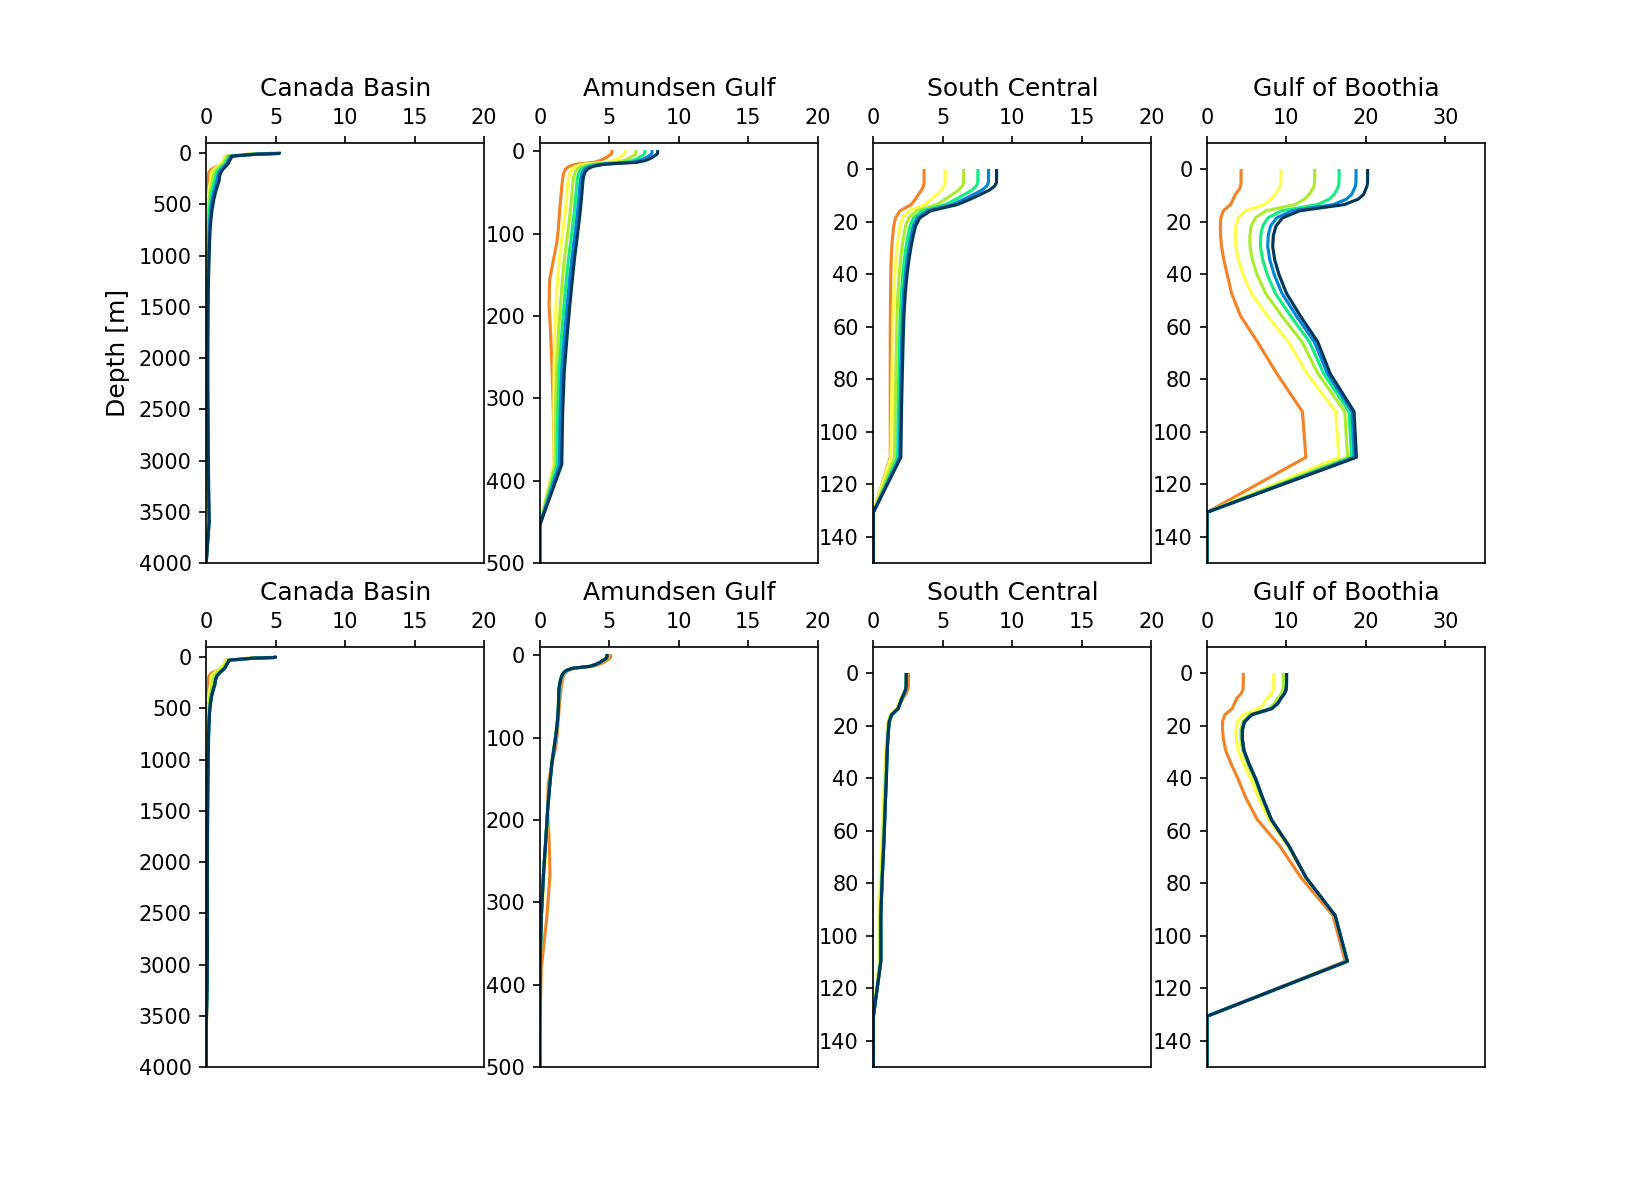

No handles with labels found to put in legend.


In [47]:
fig, ax = plt.subplots(2,4, figsize=(11,8))

for axes in ax.flatten():
    axes.invert_yaxis()
#     axes.set_xlabel('Mn', fontsize=12)
    axes.tick_params(axis='both', labelsize=10)
    axes.xaxis.tick_top()    
    axes.xaxis.set_label_position('top') 
    axes.set_xlim(0,20)
    
ax[0,0].plot(dissolmn1[month,:,i1,j1], depth, '-', color=c[0])
ax[0,0].plot(dissolmn2[month,:,i1,j1], depth, '-', color=c[1])
ax[0,0].plot(dissolmn3[month,:,i1,j1], depth, '-', color=c[2])
ax[0,0].plot(dissolmn4[month,:,i1,j1], depth, '-', color=c[3])
ax[0,0].plot(dissolmn5[month,:,i1,j1], depth, '-', color=c[4])
ax[0,0].plot(dissolmn6[month,:,i1,j1], depth, '-', color=c[5])
ax[0,0].set_title('Canada Basin')

ax[0,1].plot(dissolmn1[month,:,i2,j2], depth, '-', color=c[0])
ax[0,1].plot(dissolmn2[month,:,i2,j2], depth, '-', color=c[1])
ax[0,1].plot(dissolmn3[month,:,i2,j2], depth, '-', color=c[2])
ax[0,1].plot(dissolmn4[month,:,i2,j2], depth, '-', color=c[3])
ax[0,1].plot(dissolmn5[month,:,i2,j2], depth, '-', color=c[4])
ax[0,1].plot(dissolmn6[month,:,i2,j2], depth, '-', color=c[5])
ax[0,1].set_title('Amundsen Gulf')

ax[0,2].plot(dissolmn1[month,:,i3,j3], depth, '-', color=c[0])
ax[0,2].plot(dissolmn2[month,:,i3,j3], depth, '-', color=c[1])
ax[0,2].plot(dissolmn3[month,:,i3,j3], depth, '-', color=c[2])
ax[0,2].plot(dissolmn4[month,:,i3,j3], depth, '-', color=c[3])
ax[0,2].plot(dissolmn5[month,:,i3,j3], depth, '-', color=c[4])
ax[0,2].plot(dissolmn6[month,:,i3,j3], depth, '-', color=c[5])
ax[0,2].set_title('South Central')

ax[0,3].plot(dissolmn1[month,:,i4,j4], depth, '-', color=c[0])
ax[0,3].plot(dissolmn2[month,:,i4,j4], depth, '-', color=c[1])
ax[0,3].plot(dissolmn3[month,:,i4,j4], depth, '-', color=c[2])
ax[0,3].plot(dissolmn4[month,:,i4,j4], depth, '-', color=c[3])
ax[0,3].plot(dissolmn5[month,:,i4,j4], depth, '-', color=c[4])
ax[0,3].plot(dissolmn6[month,:,i4,j4], depth, '-', color=c[5])
ax[0,3].set_title('Gulf of Boothia')


ax[1,0].plot(dissolmn7[month,:,i1,j1], depth, '-', color=c[0])
ax[1,0].plot(dissolmn8[month,:,i1,j1], depth, '-', color=c[1])
ax[1,0].plot(dissolmn9[month,:,i1,j1], depth, '-', color=c[2])
ax[1,0].plot(dissolmn10[month,:,i1,j1], depth, '-', color=c[3])
ax[1,0].plot(dissolmn11[month,:,i1,j1], depth, '-', color=c[4])
ax[1,0].plot(dissolmn12[month,:,i1,j1], depth, '-', color=c[5])
ax[1,0].set_title('Canada Basin')

ax[1,1].plot(dissolmn7[month,:,i2,j2], depth, '-', color=c[0])
ax[1,1].plot(dissolmn8[month,:,i2,j2], depth, '-', color=c[1])
ax[1,1].plot(dissolmn9[month,:,i2,j2], depth, '-', color=c[2])
ax[1,1].plot(dissolmn10[month,:,i2,j2], depth, '-', color=c[3])
ax[1,1].plot(dissolmn11[month,:,i2,j2], depth, '-', color=c[4])
ax[1,1].plot(dissolmn12[month,:,i2,j2], depth, '-', color=c[5])
ax[1,1].set_title('Amundsen Gulf')

ax[1,2].plot(dissolmn7[month,:,i3,j3], depth, '-', color=c[0])
ax[1,2].plot(dissolmn8[month,:,i3,j3], depth, '-', color=c[1])
ax[1,2].plot(dissolmn9[month,:,i3,j3], depth, '-', color=c[2])
ax[1,2].plot(dissolmn10[month,:,i3,j3], depth, '-', color=c[3])
ax[1,2].plot(dissolmn11[month,:,i3,j3], depth, '-', color=c[4])
ax[1,2].plot(dissolmn12[month,:,i3,j3], depth, '-', color=c[5])
ax[1,2].set_title('South Central')

ax[1,3].plot(dissolmn7[month,:,i4,j4], depth, '-', color=c[0])
ax[1,3].plot(dissolmn8[month,:,i4,j4], depth, '-', color=c[1])
ax[1,3].plot(dissolmn9[month,:,i4,j4], depth, '-', color=c[2])
ax[1,3].plot(dissolmn10[month,:,i4,j4], depth, '-', color=c[3])
ax[1,3].plot(dissolmn11[month,:,i4,j4], depth, '-', color=c[4])
ax[1,3].plot(dissolmn12[month,:,i4,j4], depth, '-', color=c[5])
ax[1,3].set_title('Gulf of Boothia')

ax[0,0].set_ylim(4000,-100)
ax[1,0].set_ylim(4000,-100)
ax[0,1].set_ylim(500,-10)
ax[1,1].set_ylim(500,-10)
ax[0,2].set_ylim(150,-10)
ax[1,2].set_ylim(150,-10)
ax[0,3].set_ylim(150,-10)
ax[1,3].set_ylim(150,-10)
ax[0,3].set_xlim(0,35)
ax[1,3].set_xlim(0,35)

ax[0,0].set_ylabel('Depth [m]', fontsize=12)
ax[0,0].legend(loc=(0.15, 0.1), frameon=False,fontsize=10)

<IPython.core.display.Javascript object>


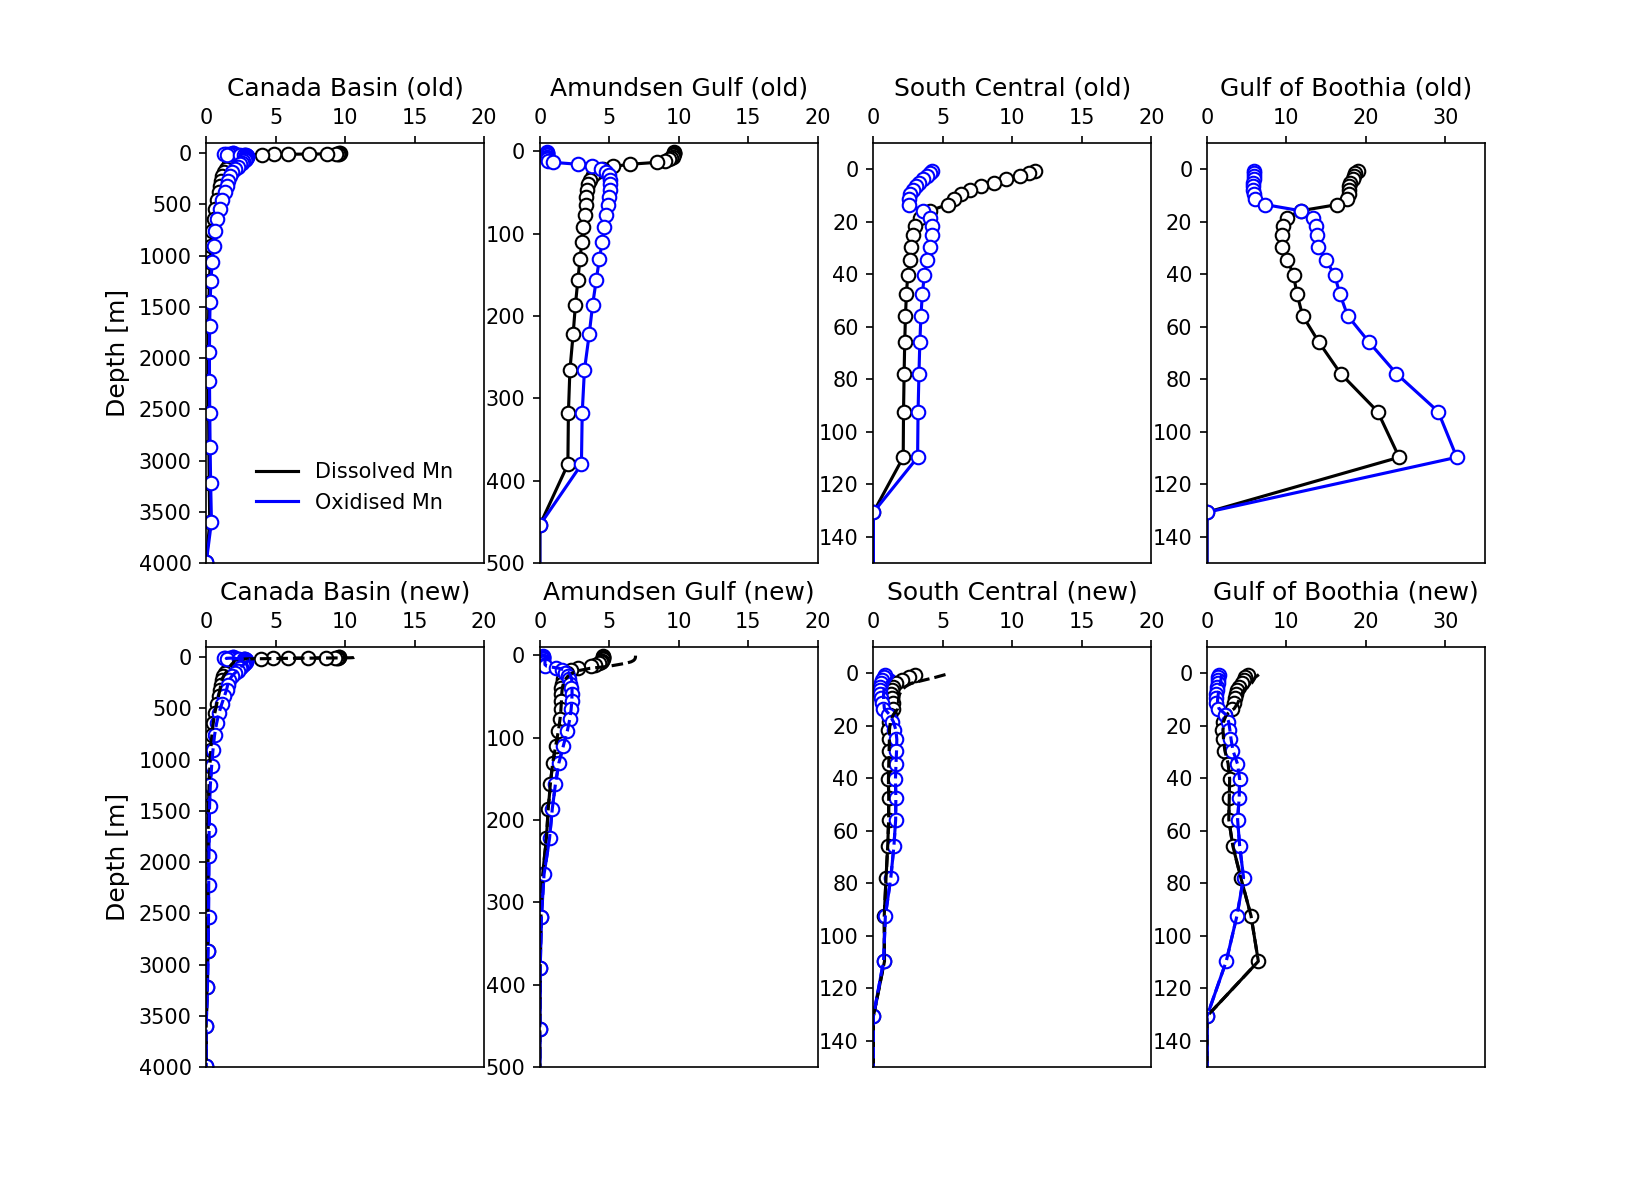

(0, 20)

In [19]:
fig, ax = plt.subplots(2,4, figsize=(11,8))

for axes in ax.flatten():
    axes.invert_yaxis()
#     axes.set_xlabel('Mn', fontsize=12)
    axes.tick_params(axis='both', labelsize=10)
    axes.xaxis.tick_top()    
    axes.xaxis.set_label_position('top') 
    axes.set_xlim(0,20)
    
ax[0,0].plot(dissolmn2[month,:,i1,j1], depth, '-k', label='Dissolved Mn')
ax[0,0].plot(dissolmn2[month,:,i1,j1], depth, '.w', markersize=13, markeredgecolor='k')
ax[0,0].plot(oxidismn2[month,:,i1,j1], depth, '-b', label='Oxidised Mn')
ax[0,0].plot(oxidismn2[month,:,i1,j1], depth, '.w', markersize=13, markeredgecolor='b')
ax[0,0].set_title('Canada Basin (old)')

ax[0,1].plot(dissolmn2[month,:,i2,j2], depth, '-k')
ax[0,1].plot(dissolmn2[month,:,i2,j2], depth, '.w', markersize=13, markeredgecolor='k')
ax[0,1].plot(oxidismn2[month,:,i2,j2], depth, '-b')
ax[0,1].plot(oxidismn2[month,:,i2,j2], depth, '.w', markersize=13, markeredgecolor='b')
ax[0,1].set_title('Amundsen Gulf (old)')

ax[0,2].plot(dissolmn2[month,:,i3,j3], depth, '-k')
ax[0,2].plot(dissolmn2[month,:,i3,j3], depth, '.w', markersize=13, markeredgecolor='k')
ax[0,2].plot(oxidismn2[month,:,i3,j3], depth, '-b')
ax[0,2].plot(oxidismn2[month,:,i3,j3], depth, '.w', markersize=13, markeredgecolor='b')
ax[0,2].set_title('South Central (old)')

ax[0,3].plot(dissolmn2[month,:,i4,j4], depth, '-k')
ax[0,3].plot(dissolmn2[month,:,i4,j4], depth, '.w', markersize=13, markeredgecolor='k')
ax[0,3].plot(oxidismn2[month,:,i4,j4], depth, '-b')
ax[0,3].plot(oxidismn2[month,:,i4,j4], depth, '.w', markersize=13, markeredgecolor='b')
ax[0,3].set_title('Gulf of Boothia (old)')

# results_folder3 = '/data/brogalla/run_storage/Mn-set6-202011/ref-'+str(year)+'-old-burial/'
# results_folder4 = '/data/brogalla/run_storage/Mn-set6-202011/ref-'+str(year)+'-new-burial-rusustuning1/'

ax[1,0].plot(dissolmn5[month,:,i1,j1], depth, '-k')
ax[1,0].plot(dissolmn5[month,:,i1,j1], depth, '.w', markersize=13, markeredgecolor='k')
ax[1,0].plot(oxidismn5[month,:,i1,j1], depth, '-b')
ax[1,0].plot(oxidismn5[month,:,i1,j1], depth, '.w', markersize=13, markeredgecolor='b')
# ax[1,0].plot(oxidismn1[month,:,i1,j1], depth, '-r')
# ax[1,0].plot(oxidismn1[month,:,i1,j1], depth, '.w', markersize=13, markeredgecolor='r')
ax[1,0].plot(dissolmn6[month,:,i1,j1], depth, '--k')
ax[1,0].plot(oxidismn6[month,:,i1,j1], depth, '--b')
ax[1,0].set_title('Canada Basin (new)')

ax[1,1].plot(dissolmn5[month,:,i2,j2], depth, '-k')
ax[1,1].plot(dissolmn5[month,:,i2,j2], depth, '.w', markersize=13, markeredgecolor='k')
ax[1,1].plot(oxidismn5[month,:,i2,j2], depth, '-b')
ax[1,1].plot(oxidismn5[month,:,i2,j2], depth, '.w', markersize=13, markeredgecolor='b')
# ax[1,1].plot(dissolmn4[month,:,i2,j2], depth, '--k')
# ax[1,1].plot(oxidismn4[month,:,i2,j2], depth, '--b')
ax[1,1].plot(dissolmn6[month,:,i2,j2], depth, '--k')
ax[1,1].plot(oxidismn6[month,:,i2,j2], depth, '--b')
# ax[1,1].plot(oxidismn1[month,:,i2,j2], depth, '-r')
# ax[1,1].plot(oxidismn1[month,:,i2,j2], depth, '.w', markersize=13, markeredgecolor='r')
ax[1,1].set_title('Amundsen Gulf (new)')

ax[1,2].plot(dissolmn5[month,:,i3,j3], depth, '-k')
ax[1,2].plot(dissolmn5[month,:,i3,j3], depth, '.w', markersize=13, markeredgecolor='k')
ax[1,2].plot(oxidismn5[month,:,i3,j3], depth, '-b')
ax[1,2].plot(oxidismn5[month,:,i3,j3], depth, '.w', markersize=13, markeredgecolor='b')
# ax[1,2].plot(dissolmn4[month,:,i3,j3], depth, '--k')
# ax[1,2].plot(oxidismn4[month,:,i3,j3], depth, '--b')
ax[1,2].plot(dissolmn6[month,:,i3,j3], depth, '--k')
ax[1,2].plot(oxidismn6[month,:,i3,j3], depth, '--b')
# ax[1,2].plot(oxidismn1[month,:,i3,j3], depth, '-r')
# ax[1,2].plot(oxidismn1[month,:,i3,j3], depth, '.w', markersize=13, markeredgecolor='r')
ax[1,2].set_title('South Central (new)')

ax[1,3].plot(dissolmn5[month,:,i4,j4], depth, '-k')
ax[1,3].plot(dissolmn5[month,:,i4,j4], depth, '.w', markersize=13, markeredgecolor='k')
ax[1,3].plot(oxidismn5[month,:,i4,j4], depth, '-b')
ax[1,3].plot(oxidismn5[month,:,i4,j4], depth, '.w', markersize=13, markeredgecolor='b')
# ax[1,3].plot(dissolmn4[month,:,i4,j4], depth, '--k')
# ax[1,3].plot(oxidismn4[month,:,i4,j4], depth, '--b')
ax[1,3].plot(dissolmn6[month,:,i4,j4], depth, '--k')
ax[1,3].plot(oxidismn6[month,:,i4,j4], depth, '--b')
# ax[1,3].plot(oxidismn3[month,:,i1,j1], depth, '-r')
# ax[1,3].plot(oxidismn3[month,:,i1,j1], depth, '.w', markersize=13, markeredgecolor='r')
ax[1,3].set_title('Gulf of Boothia (new)')

ax[0,0].set_ylim(4000,-100); ax[1,0].set_ylim(4000,-100);
ax[0,1].set_ylim(500,-10); ax[1,1].set_ylim(500,-10);
ax[0,2].set_ylim(150,-10); ax[1,2].set_ylim(150,-10);
ax[0,3].set_ylim(150,-10); ax[1,3].set_ylim(150,-10);

ax[0,0].set_ylabel('Depth [m]', fontsize=12)
ax[1,0].set_ylabel('Depth [m]', fontsize=12)
ax[0,0].legend(loc=(0.15, 0.1), frameon=False,fontsize=10)
ax[0,3].set_xlim(0,35)
ax[1,3].set_xlim(0,35)
ax[1,1].set_xlim(0,20)
ax[1,2].set_xlim(0,20)

<IPython.core.display.Javascript object>


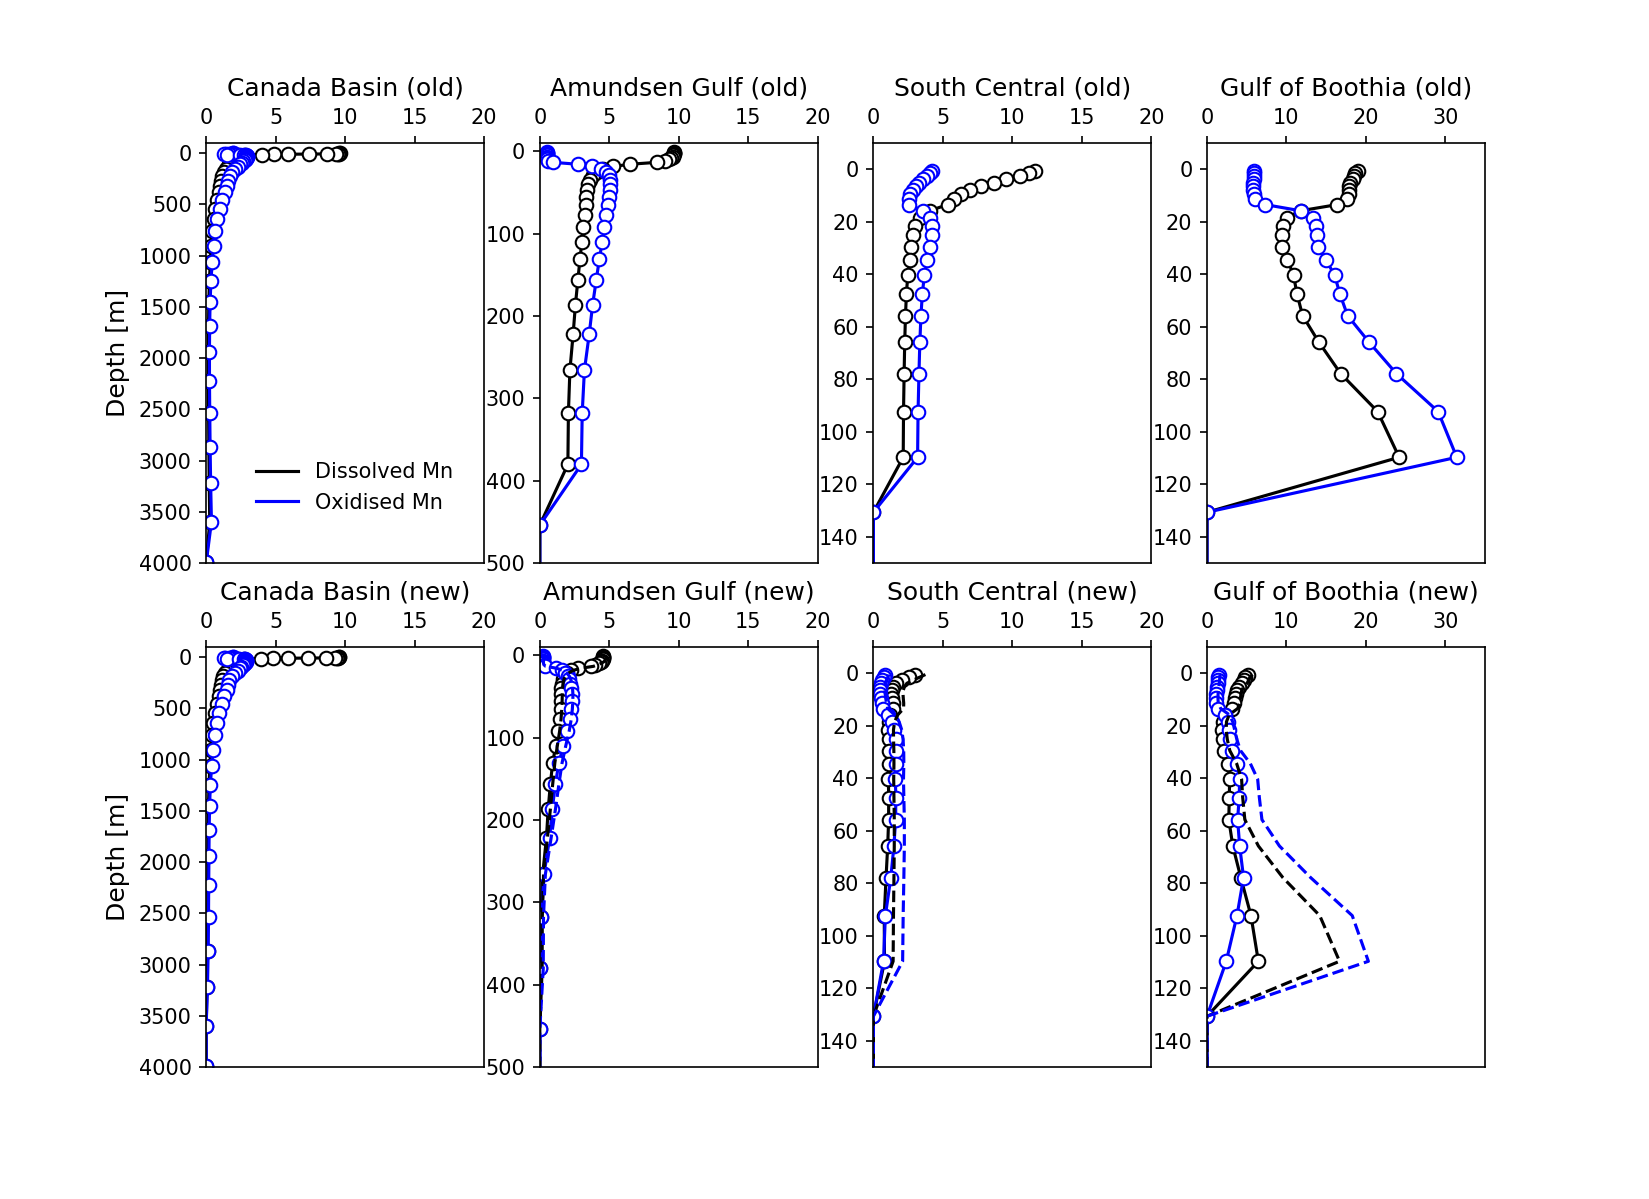

(0, 20)

In [25]:
fig, ax = plt.subplots(2,4, figsize=(11,8))

for axes in ax.flatten():
    axes.invert_yaxis()
#     axes.set_xlabel('Mn', fontsize=12)
    axes.tick_params(axis='both', labelsize=10)
    axes.xaxis.tick_top()    
    axes.xaxis.set_label_position('top') 
    axes.set_xlim(0,20)
    
ax[0,0].plot(dissolmn2[month,:,i1,j1], depth, '-k', label='Dissolved Mn')
ax[0,0].plot(dissolmn2[month,:,i1,j1], depth, '.w', markersize=13, markeredgecolor='k')
ax[0,0].plot(oxidismn2[month,:,i1,j1], depth, '-b', label='Oxidised Mn')
ax[0,0].plot(oxidismn2[month,:,i1,j1], depth, '.w', markersize=13, markeredgecolor='b')
ax[0,0].set_title('Canada Basin (old)')

ax[0,1].plot(dissolmn2[month,:,i2,j2], depth, '-k')
ax[0,1].plot(dissolmn2[month,:,i2,j2], depth, '.w', markersize=13, markeredgecolor='k')
ax[0,1].plot(oxidismn2[month,:,i2,j2], depth, '-b')
ax[0,1].plot(oxidismn2[month,:,i2,j2], depth, '.w', markersize=13, markeredgecolor='b')
ax[0,1].set_title('Amundsen Gulf (old)')

ax[0,2].plot(dissolmn2[month,:,i3,j3], depth, '-k')
ax[0,2].plot(dissolmn2[month,:,i3,j3], depth, '.w', markersize=13, markeredgecolor='k')
ax[0,2].plot(oxidismn2[month,:,i3,j3], depth, '-b')
ax[0,2].plot(oxidismn2[month,:,i3,j3], depth, '.w', markersize=13, markeredgecolor='b')
ax[0,2].set_title('South Central (old)')

ax[0,3].plot(dissolmn2[month,:,i4,j4], depth, '-k')
ax[0,3].plot(dissolmn2[month,:,i4,j4], depth, '.w', markersize=13, markeredgecolor='k')
ax[0,3].plot(oxidismn2[month,:,i4,j4], depth, '-b')
ax[0,3].plot(oxidismn2[month,:,i4,j4], depth, '.w', markersize=13, markeredgecolor='b')
ax[0,3].set_title('Gulf of Boothia (old)')

# results_folder3 = '/data/brogalla/run_storage/Mn-set6-202011/ref-'+str(year)+'-old-burial/'
# results_folder4 = '/data/brogalla/run_storage/Mn-set6-202011/ref-'+str(year)+'-new-burial-rusustuning1/'

ax[1,0].plot(dissolmn5[month,:,i1,j1], depth, '-k')
ax[1,0].plot(dissolmn5[month,:,i1,j1], depth, '.w', markersize=13, markeredgecolor='k')
ax[1,0].plot(oxidismn5[month,:,i1,j1], depth, '-b')
ax[1,0].plot(oxidismn5[month,:,i1,j1], depth, '.w', markersize=13, markeredgecolor='b')
# ax[1,0].plot(oxidismn1[month,:,i1,j1], depth, '-r')
# ax[1,0].plot(oxidismn1[month,:,i1,j1], depth, '.w', markersize=13, markeredgecolor='r')
ax[1,0].set_title('Canada Basin (new)')

ax[1,1].plot(dissolmn5[month,:,i2,j2], depth, '-k')
ax[1,1].plot(dissolmn5[month,:,i2,j2], depth, '.w', markersize=13, markeredgecolor='k')
ax[1,1].plot(oxidismn5[month,:,i2,j2], depth, '-b')
ax[1,1].plot(oxidismn5[month,:,i2,j2], depth, '.w', markersize=13, markeredgecolor='b')
# ax[1,1].plot(dissolmn4[month,:,i2,j2], depth, '--k')
# ax[1,1].plot(oxidismn4[month,:,i2,j2], depth, '--b')
ax[1,1].plot(dissolmn3[month,:,i2,j2], depth, '--k')
ax[1,1].plot(oxidismn3[month,:,i2,j2], depth, '--b')
# ax[1,1].plot(oxidismn1[month,:,i2,j2], depth, '-r')
# ax[1,1].plot(oxidismn1[month,:,i2,j2], depth, '.w', markersize=13, markeredgecolor='r')
ax[1,1].set_title('Amundsen Gulf (new)')

ax[1,2].plot(dissolmn5[month,:,i3,j3], depth, '-k')
ax[1,2].plot(dissolmn5[month,:,i3,j3], depth, '.w', markersize=13, markeredgecolor='k')
ax[1,2].plot(oxidismn5[month,:,i3,j3], depth, '-b')
ax[1,2].plot(oxidismn5[month,:,i3,j3], depth, '.w', markersize=13, markeredgecolor='b')
# ax[1,2].plot(dissolmn4[month,:,i3,j3], depth, '--k')
# ax[1,2].plot(oxidismn4[month,:,i3,j3], depth, '--b')
ax[1,2].plot(dissolmn3[month,:,i3,j3], depth, '--k')
ax[1,2].plot(oxidismn3[month,:,i3,j3], depth, '--b')
# ax[1,2].plot(oxidismn1[month,:,i3,j3], depth, '-r')
# ax[1,2].plot(oxidismn1[month,:,i3,j3], depth, '.w', markersize=13, markeredgecolor='r')
ax[1,2].set_title('South Central (new)')

ax[1,3].plot(dissolmn5[month,:,i4,j4], depth, '-k')
ax[1,3].plot(dissolmn5[month,:,i4,j4], depth, '.w', markersize=13, markeredgecolor='k')
ax[1,3].plot(oxidismn5[month,:,i4,j4], depth, '-b')
ax[1,3].plot(oxidismn5[month,:,i4,j4], depth, '.w', markersize=13, markeredgecolor='b')
# ax[1,3].plot(dissolmn4[month,:,i4,j4], depth, '--k')
# ax[1,3].plot(oxidismn4[month,:,i4,j4], depth, '--b')
ax[1,3].plot(dissolmn3[month,:,i4,j4], depth, '--k')
ax[1,3].plot(oxidismn3[month,:,i4,j4], depth, '--b')
# ax[1,3].plot(oxidismn3[month,:,i1,j1], depth, '-r')
# ax[1,3].plot(oxidismn3[month,:,i1,j1], depth, '.w', markersize=13, markeredgecolor='r')
ax[1,3].set_title('Gulf of Boothia (new)')

ax[0,0].set_ylim(4000,-100); ax[1,0].set_ylim(4000,-100);
ax[0,1].set_ylim(500,-10); ax[1,1].set_ylim(500,-10);
ax[0,2].set_ylim(150,-10); ax[1,2].set_ylim(150,-10);
ax[0,3].set_ylim(150,-10); ax[1,3].set_ylim(150,-10);

ax[0,0].set_ylabel('Depth [m]', fontsize=12)
ax[1,0].set_ylabel('Depth [m]', fontsize=12)
ax[0,0].legend(loc=(0.15, 0.1), frameon=False,fontsize=10)
ax[0,3].set_xlim(0,35)
ax[1,3].set_xlim(0,35)
ax[1,1].set_xlim(0,20)
ax[1,2].set_xlim(0,20)

<IPython.core.display.Javascript object>


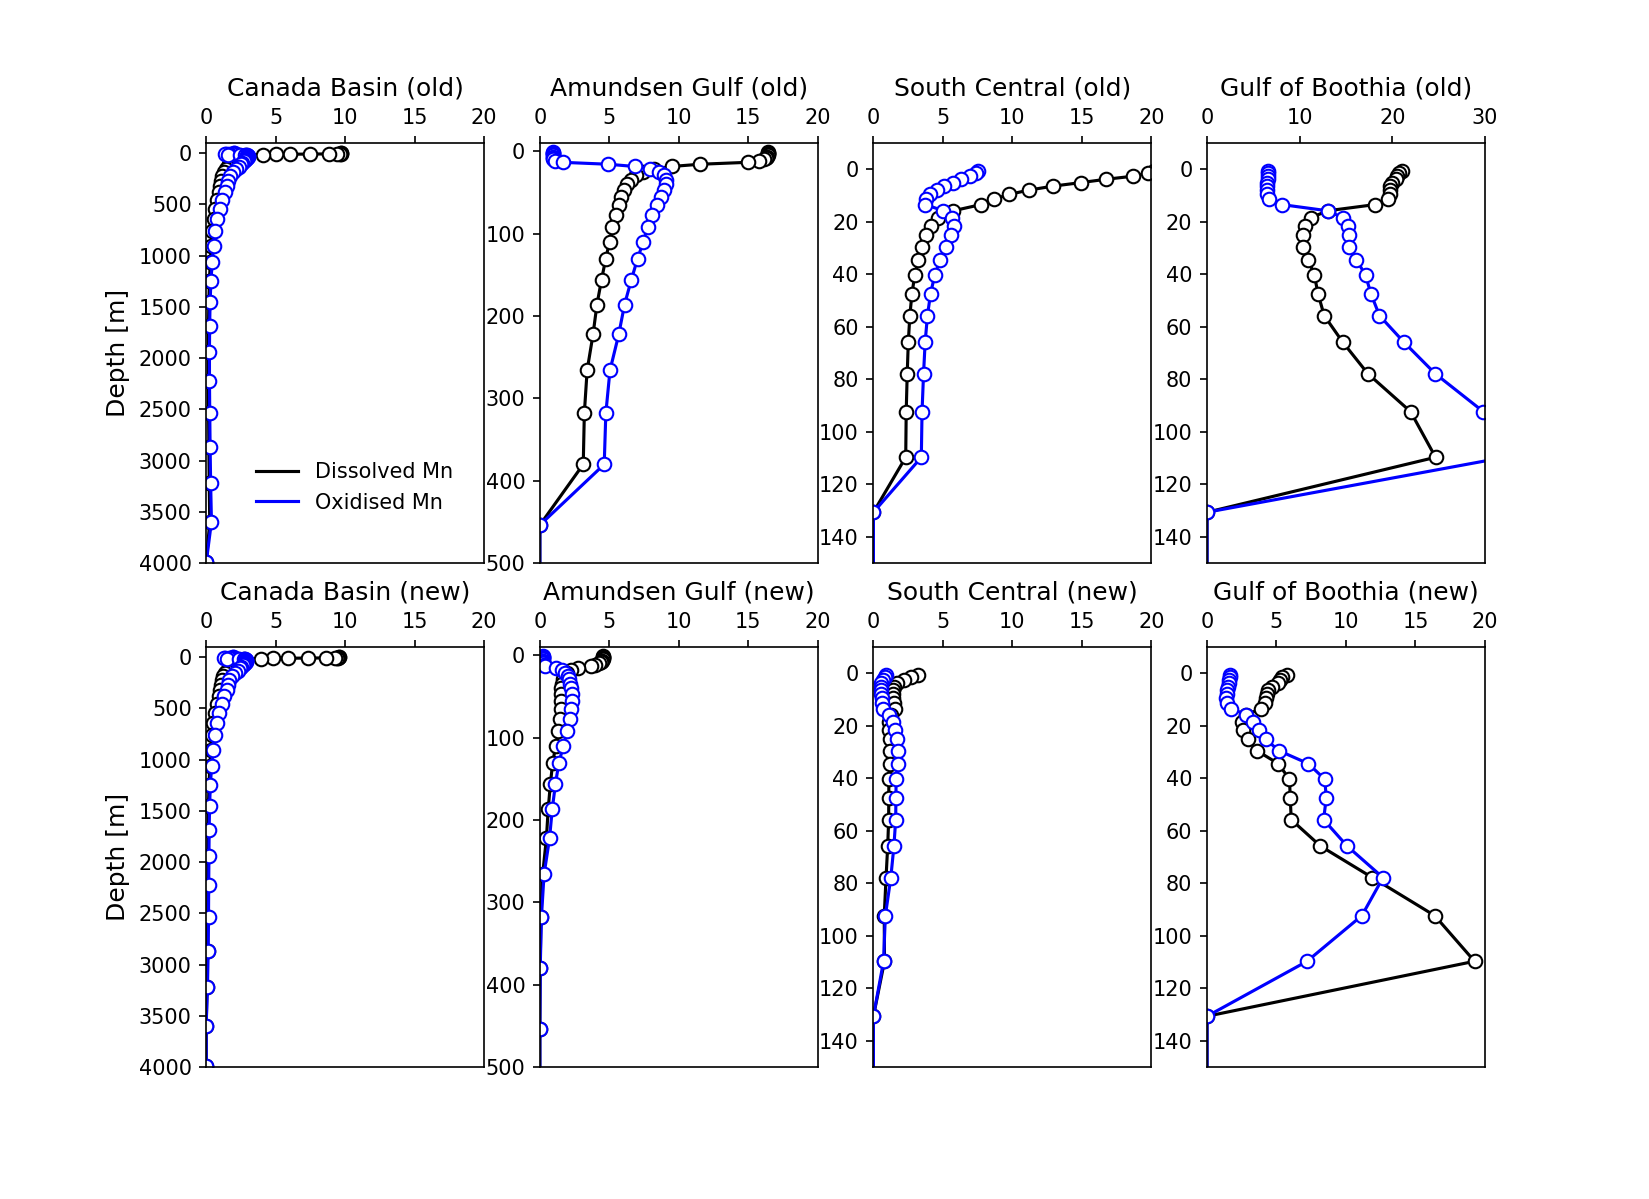

(0, 30)

In [24]:
fig, ax = plt.subplots(2,4, figsize=(11,8))

for axes in ax.flatten():
    axes.invert_yaxis()
#     axes.set_xlabel('Mn', fontsize=12)
    axes.tick_params(axis='both', labelsize=10)
    axes.xaxis.tick_top()    
    axes.xaxis.set_label_position('top') 
    axes.set_xlim(0,20)
    
ax[0,0].plot(dissolmn1[month,:,i1,j1], depth, '-k', label='Dissolved Mn')
ax[0,0].plot(dissolmn1[month,:,i1,j1], depth, '.w', markersize=13, markeredgecolor='k')
ax[0,0].plot(oxidismn1[month,:,i1,j1], depth, '-b', label='Oxidised Mn')
ax[0,0].plot(oxidismn1[month,:,i1,j1], depth, '.w', markersize=13, markeredgecolor='b')
ax[0,0].set_title('Canada Basin (old)')

ax[0,1].plot(dissolmn1[month,:,i2,j2], depth, '-k')
ax[0,1].plot(dissolmn1[month,:,i2,j2], depth, '.w', markersize=13, markeredgecolor='k')
ax[0,1].plot(oxidismn1[month,:,i2,j2], depth, '-b')
ax[0,1].plot(oxidismn1[month,:,i2,j2], depth, '.w', markersize=13, markeredgecolor='b')
ax[0,1].set_title('Amundsen Gulf (old)')

ax[0,2].plot(dissolmn1[month,:,i3,j3], depth, '-k')
ax[0,2].plot(dissolmn1[month,:,i3,j3], depth, '.w', markersize=13, markeredgecolor='k')
ax[0,2].plot(oxidismn1[month,:,i3,j3], depth, '-b')
ax[0,2].plot(oxidismn1[month,:,i3,j3], depth, '.w', markersize=13, markeredgecolor='b')
ax[0,2].set_title('South Central (old)')

ax[0,3].plot(dissolmn1[month,:,i4,j4], depth, '-k')
ax[0,3].plot(dissolmn1[month,:,i4,j4], depth, '.w', markersize=13, markeredgecolor='k')
ax[0,3].plot(oxidismn1[month,:,i4,j4], depth, '-b')
ax[0,3].plot(oxidismn1[month,:,i4,j4], depth, '.w', markersize=13, markeredgecolor='b')
ax[0,3].set_title('Gulf of Boothia (old)')

ax[1,0].plot(dissolmn4[month,:,i1,j1], depth, '-k')
ax[1,0].plot(dissolmn4[month,:,i1,j1], depth, '.w', markersize=13, markeredgecolor='k')
ax[1,0].plot(oxidismn4[month,:,i1,j1], depth, '-b')
ax[1,0].plot(oxidismn4[month,:,i1,j1], depth, '.w', markersize=13, markeredgecolor='b')
ax[1,0].set_title('Canada Basin (new)')

ax[1,1].plot(dissolmn4[month,:,i2,j2], depth, '-k')
ax[1,1].plot(dissolmn4[month,:,i2,j2], depth, '.w', markersize=13, markeredgecolor='k')
ax[1,1].plot(oxidismn4[month,:,i2,j2], depth, '-b')
ax[1,1].plot(oxidismn4[month,:,i2,j2], depth, '.w', markersize=13, markeredgecolor='b')
ax[1,1].set_title('Amundsen Gulf (new)')

ax[1,2].plot(dissolmn4[month,:,i3,j3], depth, '-k')
ax[1,2].plot(dissolmn4[month,:,i3,j3], depth, '.w', markersize=13, markeredgecolor='k')
ax[1,2].plot(oxidismn4[month,:,i3,j3], depth, '-b')
ax[1,2].plot(oxidismn4[month,:,i3,j3], depth, '.w', markersize=13, markeredgecolor='b')
ax[1,2].set_title('South Central (new)')

ax[1,3].plot(dissolmn4[month,:,i4,j4], depth, '-k')
ax[1,3].plot(dissolmn4[month,:,i4,j4], depth, '.w', markersize=13, markeredgecolor='k')
ax[1,3].plot(oxidismn4[month,:,i4,j4], depth, '-b')
ax[1,3].plot(oxidismn4[month,:,i4,j4], depth, '.w', markersize=13, markeredgecolor='b')
ax[1,3].set_title('Gulf of Boothia (new)')

ax[0,0].set_ylim(4000,-100); ax[1,0].set_ylim(4000,-100);
ax[0,1].set_ylim(500,-10); ax[1,1].set_ylim(500,-10);
ax[0,2].set_ylim(150,-10); ax[1,2].set_ylim(150,-10);
ax[0,3].set_ylim(150,-10); ax[1,3].set_ylim(150,-10);

ax[0,0].set_ylabel('Depth [m]', fontsize=12)
ax[1,0].set_ylabel('Depth [m]', fontsize=12)
ax[0,0].legend(loc=(0.15, 0.1), frameon=False,fontsize=10)
ax[0,3].set_xlim(0,30)